In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

train_x = pd.read_csv('csv_files/train_binary_x.csv')
train_y = pd.read_csv('csv_files/train_binary_y.csv')
test_x = pd.read_csv('csv_files/test_binary_x.csv')
test_y = pd.read_csv('csv_files/test_binary_y.csv')

train_x_IVF = pd.read_csv('csv_files/x_train_binary_IVF.csv')
train_y_IVF = pd.read_csv('csv_files/y_train_binary_IVF.csv')
test_x_IVF = pd.read_csv('csv_files/x_test_binary_IVF.csv')
test_y_IVF = pd.read_csv('csv_files/y_test_binary_IVF.csv')

In [19]:
print('Test_x shape: ', test_x.shape)
print('Train_x shape: ', train_x.shape)
print('Train_y shape: ', train_y.shape)

print('Test_x_IVF shape: ', test_x_IVF.shape)
print('Train_x_IVF shape: ', train_x_IVF.shape)
print('Train_y_IVF shape: ', train_y_IVF.shape)

Test_x shape:  (31226, 28)
Train_x shape:  (124904, 28)
Train_y shape:  (124904, 1)
Test_x_IVF shape:  (31226, 27)
Train_x_IVF shape:  (124904, 27)
Train_y_IVF shape:  (124904, 1)


In [20]:
X = train_x.values
y = train_y.astype(int).values.ravel()

per_clf = Perceptron(
    max_iter=1000, 
    tol=1e-3, 
    random_state=42)

per_clf.fit(X, y)

y_pred = per_clf.predict(test_x.values)

In [21]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
from sklearn.metrics import classification_report

print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     27451
           1       0.77      1.00      0.87      3775

    accuracy                           0.96     31226
   macro avg       0.89      0.98      0.92     31226
weighted avg       0.97      0.96      0.97     31226



In [23]:
print('Confusion Matrix1:')
print(confusion_matrix(test_y, y_pred))

Confusion Matrix1:
[[26326  1125]
 [    0  3775]]


In [25]:
X_IVF = train_x_IVF.values
y_IVF = train_y_IVF.astype(int).values.ravel()

per_clf_IVF = Perceptron(
    max_iter=1000, 
    tol=1e-3, 
    random_state=42)

per_clf_IVF.fit(X_IVF, y_IVF)

y_pred_IVF = per_clf_IVF.predict(test_x_IVF.values)

In [26]:
y_pred_IVF

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
print(classification_report(test_y_IVF, y_pred_IVF))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     26270
           1       0.60      0.01      0.02      4956

    accuracy                           0.84     31226
   macro avg       0.72      0.51      0.47     31226
weighted avg       0.80      0.84      0.77     31226



In [28]:
# Using SMOTE to resample target data 
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state = 100, sampling_strategy = 1.0)
train_x_smt, train_y_smt = smt.fit_resample(train_x, train_y)

smt_IVF = SMOTE(random_state = 100, sampling_strategy = 1.0)
train_x_smt_IVF, train_y_smt_IVF = smt_IVF.fit_resample(train_x_IVF, train_y_IVF)

In [29]:
# SMOTE values on y train pregnancy model & y train IVF successful model 
print('SMOTE for live birth')
print(train_y_smt.value_counts())
print('\n')
print('SMOTE for pregnant')
print(train_y_smt_IVF.value_counts())

SMOTE for live birth
LiveBirth
0            109803
1            109803
dtype: int64


SMOTE for pregnant
Pregnant
0           105080
1           105080
dtype: int64


In [30]:
from sklearn.metrics import confusion_matrix

# Perceptron model w/SMOTE for pregnancy 
X1 = train_x_smt.values
y1 = train_y_smt.astype(int).values.ravel()
per_clf1 = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf1.fit(X1, y1)
y_pred = per_clf1.predict(test_x.values)
print('Confusion Matrix1:')
print(confusion_matrix(test_y, y_pred))
print('Classification Report1:')
print(classification_report(test_y, y_pred))
print('\n')

# Perceptron model w/SMOTE for live birth from IVF
X2 = train_x_smt_IVF.values
y2 = train_y_smt_IVF.astype(int).values.ravel()
per_clf2 = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf2.fit(X2, y2)
y_pred_IVF = per_clf2.predict(test_x_IVF.values)
print('Confusion Matrix1:')
print(confusion_matrix(test_y_IVF, y_pred_IVF))
print('Classification Report1:')
print(classification_report(test_y_IVF, y_pred_IVF))
print('\n')

Confusion Matrix1:
[[26321  1130]
 [    0  3775]]
Classification Report1:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     27451
           1       0.77      1.00      0.87      3775

    accuracy                           0.96     31226
   macro avg       0.88      0.98      0.92     31226
weighted avg       0.97      0.96      0.97     31226



Confusion Matrix1:
[[25225  1045]
 [ 3747  1209]]
Classification Report1:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     26270
           1       0.54      0.24      0.34      4956

    accuracy                           0.85     31226
   macro avg       0.70      0.60      0.62     31226
weighted avg       0.82      0.85      0.82     31226





Feature: 0, Score: -0.00420
Feature: 1, Score: 0.08473
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00001
Feature: 4, Score: -0.00000
Feature: 5, Score: -0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: -0.00000
Feature: 8, Score: 0.00002
Feature: 9, Score: 0.00048
Feature: 10, Score: -0.00173
Feature: 11, Score: 0.00055
Feature: 12, Score: 0.00089
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: -0.01033
Feature: 16, Score: -0.00016
Feature: 17, Score: -0.00045
Feature: 18, Score: -0.00156
Feature: 19, Score: 0.00125
Feature: 20, Score: 0.01190
Feature: 21, Score: 0.00023
Feature: 22, Score: -0.00165
Feature: 23, Score: -0.00033
Feature: 24, Score: -0.00492
Feature: 25, Score: -0.00194
Feature: 26, Score: 0.00082


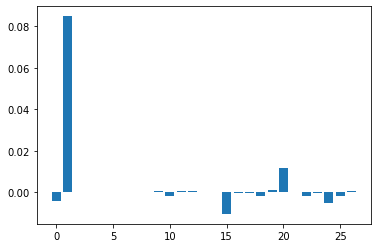

In [37]:
# Neural networks (including perceptron) do not have feature importance so I am looking at permutation importance
# IVF CHANCE OF LIVE BIRTH MODEL 

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Perform permutation importance
results_IVF = permutation_importance(per_clf2, X2, y2, scoring='neg_mean_squared_error')

# Get importance
importance_IVF = results_IVF.importances_mean

# Summarize feature importance
for i,v in enumerate(importance_IVF):
 print('Feature: %0d, Score: %.5f' % (i,v))

# Plot feature importance
plt.bar([x for x in range(len(importance_IVF))], importance_IVF)
plt.show()

Feature: 0, Score: -0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.47836
Feature: 3, Score: -0.00000
Feature: 4, Score: -0.00001
Feature: 5, Score: -0.00000
Feature: 6, Score: -0.00001
Feature: 7, Score: -0.00000
Feature: 8, Score: -0.00000
Feature: 9, Score: -0.00000
Feature: 10, Score: 0.00001
Feature: 11, Score: 0.00001
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00487
Feature: 22, Score: 0.00034
Feature: 23, Score: 0.00001
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00024
Feature: 27, Score: 0.00010


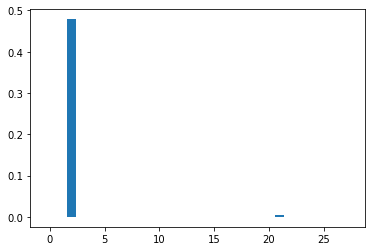

In [38]:
# Neural networks (including perceptron) do not have feature importance so I am looking at permutation importance
# IVF CHANCE OF SUCCESFUL PRGENANCY MODEL 

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Perform permutation importance
results = permutation_importance(per_clf, X1, y1, scoring='neg_mean_squared_error')

# Get importance
importance = results.importances_mean

# Summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()